Below is some code (atc_parser.py) used to parse ATC information per drug based on its Class_ID. 

In [1]:
'''
Script for parsing ATC.csv file from its found format to one that is useful
ATC.csv is found at the following website:
https://bioportal.bioontology.org/ontologies/ATC
Downloaded version: 2019AB released 11/04/2019 uploaded 11/18/2019
This file was used instead of the WHO's query database which would need to
individually query each drug compound. This is a compiled database of the same.
The WHO codes in atc_to_class.tsv are from Wikipedia
https://en.wikipedia.org/wiki/ATC_code_A for A classification, etc.
Can we find the additional classifications, since this only shows level 1 and level 2?
'''

import numpy as np
import pandas as pd

def parse_atc_to_class(file_name):
    lines = [item.strip("\n") for item in open(file_name).readlines()]
    tab = {}
    for l in lines:
        s = l.split(",")
        tab[s[0]] = s[1]
    return tab

atc_file = pd.read_csv('ATC.csv')
atc_to_class = parse_atc_to_class('atc_to_class.tsv')

#print(atc_file[0:10])
#print(atc_to_class)
#print(atc_file["Class ID"])
#atc_file[['asdf','ATC']] = atc_file["Class ID"].str.split(" ",expand=True,)
#print(atc_file["ATC"])

headers = ["Drug","Class_ID","Classification"]
out_file = pd.DataFrame(columns=headers)
for i in range(len(atc_file)):
    class_id = atc_file["Class ID"][i].split("/")[-1]
    drug = atc_file["Preferred Label"][i]
    #print(class_id+"\t"+drug)
    classif = "NA"
    #print(class_id[0:3])
    if(class_id[0:3] in atc_to_class):
        classif = atc_to_class[class_id[0:3]]
    #print(drug+'\t'+classif)
    dic = {headers[0]:drug,
            headers[1]:class_id,
            headers[2]:classif}
    out_file = out_file.append(dic, ignore_index=True)
out_file.to_csv("ATC_Mapping.csv",index=False)

In [2]:
print(out_file)

                                                   Drug Class_ID  \
0                                             silicones  A03AX13   
1                                           cefatrizine  J01DB07   
2     Technetium 99m compounds, central nervous syst...    V09AA   
3                                        urofollitropin  G03GA04   
4                                          promethazine  D04AA10   
...                                                 ...      ...   
6353                                            poldine  A03AB11   
6354               eritrityl tetranitrate, combinations  C01DA63   
6355                 Oral rehydration salt formulations    A07CA   
6356                                 Inorganic Chemical     T197   
6357                                         fomivirsen  S01AD08   

                                         Classification  
0       Drugs for functional gastrointestinal disorders  
1                       Antibacterials for systemic use  
2        

In "out_file", we have three columns: Drug, Class_ID, and Classification
Drug is self explainatory, Class_ID is the ATC classification code from the WHO, and Classification is the drug class corresponding to the Class_ID. There are 6358 unique drugs (although a handfull seem to be drug classes and don't have a corresponding classification). Seen below, these without classifications make up 141 "drugs" which do not appear to be drugs. I think it's safe to exclude these.

In [3]:
out_file[out_file['Classification'] == "NA"]

,Drug,Class_ID,Classification
35,Occupational Activity,T057,NA
51,Disease or Syndrome,T047,NA
75,Substance,T167,NA
147,Machine Activity,T066,NA
151,Sign or Symptom,T184,NA
...,...,...,...
6202,Archaeon,T194,NA
6318,Bird,T012,NA
6320,Amino Acid Sequence,T087,NA
6347,Biomedical or Dental Material,T122,NA


In [4]:
print(list(out_file[out_file['Classification'] == "NA"]["Drug"]))

['Occupational Activity', 'Disease or Syndrome', 'Substance', 'Machine Activity', 'Sign or Symptom', 'Chemical', 'SYSTEMIC HORMONAL PREPARATIONS, EXCL. SEX HORMONES AND INSULINS', 'Cell Component', 'Plant', 'Conceptual Entity', 'Phenomenon or Process', 'Virus', 'Fish', 'Biologically Active Substance', 'Drug Delivery Device', 'Carbohydrate Sequence', 'Human', 'Enzyme', 'MUSCULO-SKELETAL SYSTEM DRUGS', 'Pathologic Function', 'NERVOUS SYSTEM DRUGS', 'Amino Acid, Peptide, or Protein', 'Population Group', 'Anatomical Structure', 'Vitamin', 'Antibiotic', 'Injury or Poisoning', 'Clinical Drug', 'SENSORY ORGAN DRUGS', 'Bacterium', 'Food', 'Health Care Activity', 'Chemical Viewed Structurally', 'RESPIRATORY SYSTEM DRUGS', 'Classification', 'Idea or Concept', 'Element, Ion, or Isotope', 'Anatomical Abnormality', 'Mental or Behavioral Dysfunction', 'Biologic Function', 'Qualitative Concept', 'Clinical Attribute', 'Regulation or Law', 'Eukaryote', 'Human-caused Phenomenon or Process', 'Nucleic Aci

Do any of these drugs appear multiple times?

In [5]:
num_drugs = len(out_file["Drug"])
num_unique_drugs = len(np.unique(list(out_file["Drug"])))
print("Number of drugs: "+str(num_drugs))
print("Number of unique drugs: "+str(num_unique_drugs))

Number of drugs: 6358
Number of unique drugs: 5667


In [6]:
unique_drugs, drug_freq = np.unique(list(out_file["Drug"]),return_counts=True)
#for d,f in zip(unique_drugs,drug_freq):
#    if f > 1:
#        print(d+"\t"+str(f))

# histogram
# source: https://realpython.com/python-histograms/
import matplotlib.pyplot as plt
def histogram(d):
    # An "interface" to matplotlib.axes.Axes.hist() method
    n, bins, patches = plt.hist(x=d, bins=np.arange(1,13), color='#0504aa',
                            alpha=0.7, rwidth=0.85,align='left')
    #n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa',
    #                        alpha=0.7, rwidth=0.85)
    #print(bins)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Number of occurences of drug')
    plt.ylabel('Frequency')
    plt.title('Histogram of drug occurences')
    plt.xticks(np.arange(1, 12, step=1))
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    #plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.ylim(ymax=400)
    plt.show()
    print("Histogram is truncated for first bin which achieves a frequency of "+str(int(maxfreq)))
    
histogram(drug_freq)    

<Figure size 640x480 with 1 Axes>

Histogram is truncated for first bin which achieves a frequency of 5221


In [7]:
for i in np.unique(drug_freq)[::-1]:
    #print(i)
    drugs_freq = []
    for d,f in zip(unique_drugs,drug_freq):
        if f == i :
            drugs_freq += [d]
            #print(d+"\t"+str(f))
    print("Frequency: "+str(i)+"\t"+"Count: "+str(len(drugs_freq)))
    print(str(drugs_freq))
        

Frequency: 11	Count: 2
['betamethasone', 'dexamethasone']
Frequency: 10	Count: 1
['prednisolone']
Frequency: 9	Count: 2
['hydrocortisone', 'neomycin']
Frequency: 8	Count: 2
['chlorhexidine', 'triamcinolone']
Frequency: 7	Count: 2
['chloramphenicol', 'lidocaine']
Frequency: 6	Count: 7
['epinephrine', 'fluorometholone', 'miconazole', 'nitrofural', 'phenylephrine', 'povidone-iodine', 'tetracycline']
Frequency: 5	Count: 13
['benzydamine', 'cinchocaine', 'clioquinol', 'cromoglicic acid', 'ephedrine', 'gentamicin', 'hexamidine', 'ibuprofen', 'insulin (human)', 'magnesium sulfate', 'metronidazole', 'natamycin', 'polymyxin B']
Frequency: 4	Count: 28
['amphotericin B', 'beclometasone', 'benzocaine', 'budesonide', 'cetylpyridinium', 'chlorquinaldol', 'chlortetracycline', 'ciprofloxacin', 'cocaine', 'diclofenac', 'fluocinolone acetonide', 'fluocortolone', 'flurbiprofen', 'fusidic acid', 'hyaluronic acid', 'hydrogen peroxide', 'indometacin', 'insulin (beef)', 'insulin (pork)', 'mannitol', 'mepartr

In [8]:
# Translating this output data into a hashtable for easy querying
drug_to_classification = {}
for i in range(len(out_file)):
    line = out_file.loc[i]
    drug = line["Drug"]
    classif = line["Classification"]
    if classif != "NA":
        drug_to_classification[drug] = classif
print(drug_to_classification)

{'silicones': 'Drugs for functional gastrointestinal disorders', 'cefatrizine': 'Antibacterials for systemic use', 'Technetium 99m compounds, central nervous system diagnostic radiopharmaceuticals': 'Diagnostic radiopharmaceuticals', 'urofollitropin': 'Sex hormones and modulators of the genital system', 'promethazine': 'Antihistamines for systemic use', 'pinacidil and diuretics': 'Antihypertensives', 'sargramostim': 'Immunostimulants', 'cilostazol': 'Antithrombotic agents', 'emepronium, combinations': 'Psycholeptics', 'lanadelumab': 'Other hematological agents', 'androstanolone': 'Sex hormones and modulators of the genital system', 'Beta blocking agents, selective, thiazides and other diuretics': 'Beta blocking agents', 'mefenorex': 'Antiobesity preparations', 'BACTERIAL AND VIRAL VACCINES, COMBINED': 'Vaccines', 'emtricitabine': 'Antivirals for systemic use', 'aliskiren and amlodipine': 'Agents acting on the renin–angiotensin system', 'imiquimod': 'Antibiotics and chemotherapeutics fo

## Parsing KIBA 
The original file is from the Supplementary data for the KIBA dataset paper. This can be found here: https://pubs.acs.org/doi/pdf/10.1021/ci400709d under "Supporting Information" header. The input file is from the tab sheet "KIBA" in the original file, saved a .csv
- Original file: ci400709d_si_002.xlsx
- Input file: "kiba_in_csv.csv"







In [9]:
kiba_file = "kiba_in_csv.csv"
kiba_matrix = pd.read_csv(kiba_file,low_memory=False,index_col=0)


In [10]:
print(kiba_matrix.shape)

(52498, 467)


In [11]:
print((kiba_matrix.columns))
print(kiba_matrix)

Index(['O00141', 'O00142', 'O00238', 'O00311', 'O00329', 'O00418', 'O00443',
       'O00444', 'O00506', 'O00750',
       ...
       'Q9Y463', 'Q9Y478', 'Q9Y4K4', 'Q9Y572', 'Q9Y5S2', 'Q9Y616', 'Q9Y6E0',
       'Q9Y6K9', 'Q9Y6M4', 'Q9Y6R4'],
      dtype='object', length=467)
              O00141  O00142    O00238    O00311  O00329  O00418  O00443  \
CHEMBL10         NaN     NaN  3.518514  3.100002     4.0     3.6     NaN   
CHEMBL1000       NaN     NaN       NaN       NaN     NaN     NaN     NaN   
CHEMBL100012     NaN     NaN       NaN       NaN     NaN     NaN     NaN   
CHEMBL100016     NaN     NaN       NaN       NaN     NaN     NaN     NaN   
CHEMBL100050     NaN     NaN       NaN       NaN     NaN     NaN     NaN   
...              ...     ...       ...       ...     ...     ...     ...   
CHEMBL99852      NaN     NaN       NaN       NaN     NaN     NaN     NaN   
CHEMBL99859      NaN     NaN       NaN       NaN     NaN     NaN     NaN   
CHEMBL99923      NaN     NaN       NaN    

In [12]:
list(kiba_matrix.index)

['CHEMBL10',
 'CHEMBL1000',
 'CHEMBL100012',
 'CHEMBL100016',
 'CHEMBL100050',
 'CHEMBL100076',
 'CHEMBL100079',
 'CHEMBL100102',
 'CHEMBL100172',
 'CHEMBL100174',
 'CHEMBL100220',
 'CHEMBL100262',
 'CHEMBL100296',
 'CHEMBL100305',
 'CHEMBL100309',
 'CHEMBL100312',
 'CHEMBL100391',
 'CHEMBL100421',
 'CHEMBL100446',
 'CHEMBL100473',
 'CHEMBL100485',
 'CHEMBL100500',
 'CHEMBL100523',
 'CHEMBL100542',
 'CHEMBL100546',
 'CHEMBL100551',
 'CHEMBL100553',
 'CHEMBL100569',
 'CHEMBL100577',
 'CHEMBL1006',
 'CHEMBL100645',
 'CHEMBL100650',
 'CHEMBL100651',
 'CHEMBL100664',
 'CHEMBL100670',
 'CHEMBL100675',
 'CHEMBL100687',
 'CHEMBL100703',
 'CHEMBL100714',
 'CHEMBL100734',
 'CHEMBL100735',
 'CHEMBL100736',
 'CHEMBL100739',
 'CHEMBL100775',
 'CHEMBL100803',
 'CHEMBL100804',
 'CHEMBL100811',
 'CHEMBL100818',
 'CHEMBL100825',
 'CHEMBL100841',
 'CHEMBL100847',
 'CHEMBL100852',
 'CHEMBL1009',
 'CHEMBL100914',
 'CHEMBL100922',
 'CHEMBL100945',
 'CHEMBL100979',
 'CHEMBL100982',
 'CHEMBL101',
 'CHEMBL10

This file is a very sparse matrix of chemicals/drugs on the row names and drug targets/proteins on the column names. Next up, can we convert CHEMBL ID's to drug names, then to ATC classification?

In [13]:
chembl_mapping_table = pd.read_csv('CHEMBL27-chembl_27_molecule-0EshWWAY4CsQMatgWuN_ar_V-QZdzUH1xmCDeqTEL4s=.csv'
        ,low_memory=False,sep=";")
print(chembl_mapping_table.head)

KeyboardInterrupt: 

In [ ]:
print((chembl_mapping_table.columns))

In [ ]:
unique_names_chembl = np.unique(list(chembl_mapping_table["Name"]))
print(len(unique_names_chembl))
for n in unique_names_chembl:
    print(n)

In [ ]:
chembl_to_name = {}
for i in range(len(chembl_mapping_table)):
    line = chembl_mapping_table.loc[i]
    chembl = line['ChEMBL ID']
    name = line['Name']
    if str(name) != "nan":
        chembl_to_name[chembl] = name

In [ ]:
#list(kiba_matrix.index)
kiba_drug_names = []
count = 0
for kiba_chembl in list(kiba_matrix.index):
    kiba_name = ""
    if kiba_chembl in chembl_to_name:
        kiba_name = chembl_to_name[kiba_chembl]
        count += 1
    kiba_drug_names += [kiba_name]
#print(kiba_drug_names)
print(str(float(count)/len(kiba_drug_names))+" of kiba chembl have names")
print("Number of kiba chembl queried: "+str(len(kiba_drug_names)))
print("Number of kiba chembl with drug names: "+str(count))

In [ ]:
print(len(chembl_to_name))

In [ ]:
chembl_to_name

That's mostly NA values... Compare to ATC to see how many actually have classifications

In [ ]:
# kiba_drug_names
# drug_to_classification

for d in kiba_drug_names:
    if d in drug_to_classification:
        print(drug_to_classification[d])

In [ ]:
drug_to_classification

In [ ]:
kiba_drug_names

In [ ]:
kiba_processes = []
count = 0
for d in kiba_drug_names:
    drug_name = d.lower()
    proc = ""
    if drug_name in drug_to_classification:
        #print(drug_to_classification[drug_name])
        count += 1
        proc = drug_to_classification[drug_name]
    kiba_processes += [proc]
    
print(str(float(count)/len(kiba_processes))+" of kiba chembl have processes")
print("Number of kiba chembl ids: "+str(len(kiba_processes)))
print("Number of kiba chembl with process: "+str(count))

In [ ]:
# with names, 1760
# so it had ATC for 596/1760 of the names

In [ ]:
########################
### Adjacency Matrix ###
########################
drug_to_ATC_codes ={}

# extract the ATC codes per drug
for i in range(len(atc_file)):
    class_id = atc_file["Class ID"][i].split("/")[-1]
    drug = atc_file["Preferred Label"][i]
    if drug not in drug_to_ATC_codes:
        drug_to_ATC_codes[drug] = []
    # prevents adding multiple of the same code
    if class_id[0:3] not in drug_to_ATC_codes[drug]:
        drug_to_ATC_codes[drug] += [class_id[0:3]]
    
# extract the drugs with ATC codes (some have none)
drug_list = []
for drug in drug_to_ATC_codes.keys():
    if len(drug_to_ATC_codes[drug]) > 0:
        drug_list += [drug]


    

In [ ]:
drug_to_ATC_codes

In [ ]:
# calculate the overlap between pairs of drugs
adj_mat_file = pd.DataFrame(columns=drug_list)
for drug_1 in drug_list:
    dic = {}
    for drug_2 in drug_list:
        val = 0
        if drug_1 != drug_2:
            # count the intersect
            val = len(list(set(drug_to_ATC_codes[drug_1]) 
                 & set(drug_to_ATC_codes[drug_2])))
        dic[drug_2] = val
    adj_mat_file = adj_mat_file.append(dic, ignore_index=True)
print(adj_mat_file.size)

In [139]:
print(adj_mat_file.shape)
print(adj_mat_file)

(5667, 5667)
     silicones cefatrizine  \
0            0           0   
1            0           0   
2            0           0   
3            0           0   
4            0           0   
...        ...         ...   
5662         1           0   
5663         0           0   
5664         0           0   
5665         0           0   
5666         0           0   

     Technetium 99m compounds, central nervous system diagnostic radiopharmaceuticals  \
0                                                     0                                 
1                                                     0                                 
2                                                     0                                 
3                                                     0                                 
4                                                     0                                 
...                                                 ...                                 
566

In [153]:
rename_index = {}
for i in range(len(adj_mat_file)):
    rename_index[i] = drug_list[i]
#adj_mat_file.rename(index=rename_index)
adj_mat_file=adj_mat_file.rename(index=rename_index)

In [155]:
adj_mat_file

,silicones,cefatrizine,"Technetium 99m compounds, central nervous system diagnostic radiopharmaceuticals",urofollitropin,promethazine,pinacidil and diuretics,sargramostim,cilostazol,"emepronium, combinations",lanadelumab,...,Biomedical or Dental Material,phenobarbital,milrinone,sufentanil,cortivazol,poldine,"eritrityl tetranitrate, combinations",Oral rehydration salt formulations,Inorganic Chemical,fomivirsen
silicones,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
cefatrizine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Technetium 99m compounds, central nervous system diagnostic radiopharmaceuticals",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urofollitropin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
promethazine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
poldine,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"eritrityl tetranitrate, combinations",0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Oral rehydration salt formulations,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Inorganic Chemical,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
adj_mat_file.to_csv("AdjacencyMatrix_AllATC.csv",sep=";")

In [158]:
for d in drug_list:
    if ";" in d:
        print(d)

In [165]:
#####################################################
### Adjacency Matrix with level 1 AND level 2 ATC ###
#####################################################
level_one_score = 1
level_two_score = 1

def score_overlap(atc_list_1, atc_list_2, use_atc_level_1=True):
    global level_one_score
    global level_two_score
    
    # the number of intersect between the two lists (ATC level 2)
    score = len(set(atc_list_1) & set(atc_list_2)) * level_two_score
    
    # ATC level 1
    if(use_atc_level_1):
        # extract ATC level 1
        s1 = set()
        for a in atc_list_1:
            s1.add(a[0])
        s2 = set()
        for a in atc_list_2:
            s2.add(a[0])
            
        score_1 = len(s1 & s2) * level_one_score
        score += score_1
    return score

# calculate the overlap between pairs of drugs
adj_mat_2_file = pd.DataFrame(columns=drug_list)
for i in range(len(drug_list)):
    drug_1 = drug_list[i]
    dic = {}
    for j in range(len(drug_list)): 
        drug_2 = drug_list[j]
        
        if(j==i):   # diagonal is 0
            val = 0
        elif j < i: # take advantage of symmetry
            val = adj_mat_2_file[drug_1][j]
        else:       # score based on ATC level matches
            val = score_overlap(drug_1, drug_2, use_atc_level_1=True)
        dic[drug_2] = val
    adj_mat_2_file = adj_mat_2_file.append(dic, ignore_index=True)
    
print(adj_mat_2_file.shape)

rename_index = {}
for i in range(len(adj_mat_2_file)):
    rename_index[i] = drug_list[i]
#adj_mat_file.rename(index=rename_index)
adj_mat_2_file=adj_mat_2_file.rename(index=rename_index)
    

(5667, 5667)


In [167]:
adj_mat_2_file

,silicones,cefatrizine,"Technetium 99m compounds, central nervous system diagnostic radiopharmaceuticals",urofollitropin,promethazine,pinacidil and diuretics,sargramostim,cilostazol,"emepronium, combinations",lanadelumab,...,Biomedical or Dental Material,phenobarbital,milrinone,sufentanil,cortivazol,poldine,"eritrityl tetranitrate, combinations",Oral rehydration salt formulations,Inorganic Chemical,fomivirsen
0,0,8,14,8,8,12,6,10,12,6,...,12,10,10,10,8,10,14,12,12,10
1,8,0,14,10,14,14,8,10,14,6,...,14,12,8,12,12,6,14,14,12,10
2,14,14,0,16,20,26,16,14,28,14,...,24,20,14,16,16,14,28,30,24,16
3,8,10,16,0,12,14,8,8,14,6,...,12,14,10,12,10,10,12,16,10,10
4,8,14,20,12,0,14,12,10,18,8,...,16,18,12,10,12,10,16,18,16,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,10,6,14,10,10,12,4,6,10,8,...,12,12,10,8,6,0,10,12,10,8
5663,14,14,28,12,16,20,14,14,26,12,...,22,18,14,14,14,10,0,24,20,14
5664,12,14,30,16,18,22,14,12,22,14,...,22,18,14,18,12,12,24,0,20,16
5665,12,12,24,10,16,16,12,10,18,10,...,20,16,14,10,12,10,20,20,0,12


In [168]:
adj_mat_2_file.to_csv("AdjacencyMatrix_ATC_level_1_and_2.csv",sep=";")

In [7]:
### Convert to Edge list ###
import pandas as pd
import networkx as nx

f1 = "AdjacencyMatrix_AllATC.csv"
f2 = "AdjacencyMatrix_ATC_level_1_and_2.csv"

adjacency_matrix_atc_level_2 = pd.read_csv(f1,sep=";",index_col=0)
adjacency_matrix_atc_level_1_and_2 = pd.read_csv(f2,sep=";",index_col=0)
print(adjacency_matrix_atc_level_2.head())
print(adjacency_matrix_atc_level_2.shape)
print(adjacency_matrix_atc_level_1_and_2.head())
print(adjacency_matrix_atc_level_1_and_2.shape)

                                                    silicones  cefatrizine  \
silicones                                                   0            0   
cefatrizine                                                 0            0   
Technetium 99m compounds, central nervous syste...          0            0   
urofollitropin                                              0            0   
promethazine                                                0            0   

                                                    Technetium 99m compounds, central nervous system diagnostic radiopharmaceuticals  \
silicones                                                                                           0                                  
cefatrizine                                                                                         0                                  
Technetium 99m compounds, central nervous syste...                                                  0                      

In [10]:
# adjacency matrix 1
G1 = nx.from_pandas_adjacency(adjacency_matrix_atc_level_2)
G1.name = 'Graph from ATC codes level 2'
print(nx.info(G1))

Name: Graph from ATC codes level 2
Type: Graph
Number of nodes: 5667
Number of edges: 333894
Average degree: 117.8380


In [20]:
# adjacency matrix 2
G2 = nx.from_pandas_adjacency(adjacency_matrix_atc_level_1_and_2)
G2.name = 'Graph from ATC codes level 1 and level 2'
print(nx.info(G2))

Name: Graph from ATC codes level 1 and level 2
Type: Graph
Number of nodes: 5667
Number of edges: 15156513
Average degree: 5349.0429


In [21]:
nx.write_edgelist(G1, "AdjacencyMatrix_AllATC.edgelist")
nx.write_edgelist(G2, "AdjacencyMatrix_ATC_level_1_and_2.edgelist")

How manye of these drugs have how many ATc codes? basicallyu make a histrogram of how many different ATC level 1 it has

In [14]:
import pandas as pd
atc_mapping_file = pd.read_csv("ATC_Mapping.csv")
atc_mapping_file

,Drug,Class_ID,Classification
0,silicones,A03AX13,Drugs for functional gastrointestinal disorders
1,cefatrizine,J01DB07,Antibacterials for systemic use
2,"Technetium 99m compounds, central nervous syst...",V09AA,Diagnostic radiopharmaceuticals
3,urofollitropin,G03GA04,Sex hormones and modulators of the genital system
4,promethazine,D04AA10,Antipruritics
...,...,...,...
6353,poldine,A03AB11,Drugs for functional gastrointestinal disorders
6354,"eritrityl tetranitrate, combinations",C01DA63,Cardiac therapy
6355,Oral rehydration salt formulations,A07CA,Antidiarrheals
6356,Inorganic Chemical,T197,NaN


In [15]:
unique_drug_names = set(atc_mapping_file['Drug'])
unique_drug_names

{'nelarabine',
 'zinc compounds',
 'OTHER HEMATOLOGICAL AGENTS in ATC',
 'Acetic acid derivatives and related substances',
 'azelastine',
 'lisinopril and diuretics',
 'basiliximab',
 'carumonam',
 'mercaptopurine',
 'combinations of imidazole derivatives',
 'saruplase',
 'Acidifiers',
 'manidipine',
 'RENAL SYSTEM DIAGNOSTIC RADIOPHARMACEUTICALS',
 'thallium (201Tl) chloride',
 'valdecoxib',
 'rescinnamine and diuretics, combinations with other drugs',
 'sertindole',
 'thioridazine',
 'epacadostat',
 'aluminium glycinate',
 'amifostine',
 'isoflurane',
 'ACTH and synthetic analog preparations',
 'bretylium tosilate',
 'levocabastine',
 'other cough suppressant combinations in ATC',
 'Cimicifugae rhizoma',
 'Various diagnostic radiopharmaceuticals',
 'THYROID THERAPY DRUGS',
 'esmolol',
 'ceftazidime',
 'combinations of corticosteroids',
 'lapatinib',
 'ergotamine, combinations excl. psycholeptics',
 'Other local anesthetics in ATC',
 'oxyphencyclimine and psycholeptics',
 'nitroxoline

In [16]:
len(unique_drug_names)

5667

In [23]:
drug_atc_level_1_freq = []
only_freq_count = []
for drug in unique_drug_names:
    atc_codes = list(atc_mapping_file[atc_mapping_file['Drug'] == drug]['Class_ID'])
    #print(atc_codes)
    atc_level_one = []
    for code in atc_codes:
        atc_level_one += [code[0]]
    #print(atc_level_one)
    num_unique_atc_level_one = len(set(atc_level_one))
    drug_atc_level_1_freq += [(drug,num_unique_atc_level_one)]
    only_freq_count += [num_unique_atc_level_one]
drug_atc_level_1_freq

[('nelarabine', 1),
 ('zinc compounds', 1),
 ('OTHER HEMATOLOGICAL AGENTS in ATC', 1),
 ('Acetic acid derivatives and related substances', 1),
 ('azelastine', 2),
 ('lisinopril and diuretics', 1),
 ('basiliximab', 1),
 ('carumonam', 1),
 ('mercaptopurine', 1),
 ('combinations of imidazole derivatives', 1),
 ('saruplase', 1),
 ('Acidifiers', 1),
 ('manidipine', 1),
 ('RENAL SYSTEM DIAGNOSTIC RADIOPHARMACEUTICALS', 1),
 ('thallium (201Tl) chloride', 1),
 ('valdecoxib', 1),
 ('rescinnamine and diuretics, combinations with other drugs', 1),
 ('sertindole', 1),
 ('thioridazine', 1),
 ('epacadostat', 1),
 ('aluminium glycinate', 1),
 ('amifostine', 1),
 ('isoflurane', 1),
 ('ACTH and synthetic analog preparations', 1),
 ('bretylium tosilate', 1),
 ('levocabastine', 2),
 ('other cough suppressant combinations in ATC', 1),
 ('Cimicifugae rhizoma', 1),
 ('Various diagnostic radiopharmaceuticals', 1),
 ('THYROID THERAPY DRUGS', 1),
 ('esmolol', 1),
 ('ceftazidime', 1),
 ('combinations of cortico

[1 2 3 4 5 6 7]


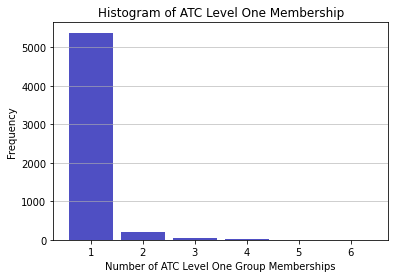

Histogram is truncated for first bin which achieves a frequency of 5375


In [24]:
import matplotlib.pyplot as plt
import numpy as np

def histogram(d):
    # An "interface" to matplotlib.axes.Axes.hist() method
    n, bins, patches = plt.hist(x=d, bins=np.arange(1,8), color='#0504aa',
                            alpha=0.7, rwidth=0.85,align='left')
    #n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa',
    #                        alpha=0.7, rwidth=0.85)
    print(bins)
    #print(patches)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Number of ATC Level One Group Memberships')
    plt.ylabel('Frequency')
    plt.title('Histogram of ATC Level One Membership')
    plt.xticks(np.arange(1, 7, step=1))
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    #plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    #plt.ylim(ymax=500)
    plt.show()
    print("Histogram is truncated for first bin which achieves a frequency of "+str(int(maxfreq)))
    
histogram(only_freq_count)

[1 2 3 4 5 6 7]


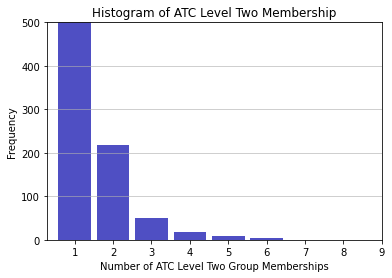

Histogram is truncated for first bin which achieves a frequency of 5365


In [22]:
drug_atc_level_2_freq = []
only_freq_count = []
for drug in unique_drug_names:
    atc_codes = list(atc_mapping_file[atc_mapping_file['Drug'] == drug]['Class_ID'])
    #print(atc_codes)
    atc_level_two = []
    for code in atc_codes:
        atc_level_two += [code[0:2]]
    #print(atc_level_one)
    num_unique_atc_level_two = len(set(atc_level_two))
    drug_atc_level_1_freq += [(drug,num_unique_atc_level_two)]
    only_freq_count += [num_unique_atc_level_two]
drug_atc_level_2_freq

import matplotlib.pyplot as plt
import numpy as np

def histogram(d):
    # An "interface" to matplotlib.axes.Axes.hist() method
    n, bins, patches = plt.hist(x=d, bins=np.arange(1,8), color='#0504aa',
                            alpha=0.7, rwidth=0.85,align='left')
    #n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa',
    #                        alpha=0.7, rwidth=0.85)
    print(bins)
    #print(patches)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Number of ATC Level Two Group Memberships')
    plt.ylabel('Frequency')
    plt.title('Histogram of ATC Level Two Membership')
    plt.xticks(np.arange(1, 10, step=1))
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    #plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.ylim(ymax=500)
    plt.show()
    print("Histogram is truncated for first bin which achieves a frequency of "+str(int(maxfreq)))
    
histogram(only_freq_count)